In [76]:
import requests
import pandas as pd

In [144]:
url = "https://jsearch.p.rapidapi.com/estimated-salary"

headers = {
    "X-Rapidapi-Key": "8d87c09f6cmsh59ce4d8689ee10dp188f81jsnf92b2e28bf59",
    "X-Rapidapi-Host": "jsearch.p.rapidapi.com"
}

countries = [
    'South Korea', 'China', 'USA', 'France', 'Australia',
    'United Kingdom', 'Canada', 'India', 'Japan', 'Germany'
]

data_list = []  # to collect raw results

for country in countries:
    querystring = {
        "job_title": "artificial intelligence engineer",
        "location": country,
        "location_type": "ANY",
        "years_of_experience": "ALL"
    }

    response = requests.get(url, headers=headers, params=querystring)

    if response.status_code == 200:
        data = response.json()
        data_list.append({"country": country, "data": data})
       

   
data_list



[{'country': 'South Korea',
  'data': {'status': 'OK',
   'request_id': '5c2698f4-ac31-4055-b40a-d9d2c896ca1d',
   'parameters': {'job_title': 'artificial intelligence engineer',
    'location': 'south korea',
    'location_type': 'ANY',
    'years_of_experience': None},
   'data': [{'location': 'South Korea',
     'job_title': 'Artificial Intelligence Engineer',
     'min_salary': 38662960,
     'max_salary': 41598400,
     'median_salary': 40130680,
     'min_base_salary': 34833240,
     'max_base_salary': 37476360,
     'median_base_salary': 36154800,
     'min_additional_pay': 3829720,
     'max_additional_pay': 4122040,
     'median_additional_pay': 3975880,
     'salary_period': 'YEAR',
     'salary_currency': 'KRW',
     'salary_count': 1,
     'salaries_updated_at': '2023-01-30T21:08:37.000Z',
     'publisher_name': 'Glassdoor',
     'publisher_link': 'https://www.glassdoor.com/Salaries/company-salaries.htm?suggestCount=0&suggestChosen=false&sc.keyword=Artificial%20Intelligence

In [146]:
job_salary = data_list 

In [ ]:
job_salary

In [ ]:
#flattening

In [150]:
flattened = []
for entry in job_salary:
    
    country = entry["country"]
    data = entry["data"]
    
    request_id = data.get("result",{})
    parameters = data.get("parameters", {})
    job_salary = data.get("data", {})

    if job_salary:
        salary_info = job_salary[0]  # First record only
        flattened.append({
            "country": country,
            "data": data,
        
            **parameters,
            **salary_info
        })
    else:
        print(f"⚠️ No salary data for {country}")

# Convert flattened list to DataFrame
df = pd.DataFrame(flattened)


In [333]:

df 

,country,data,job_title,location,location_type,years_of_experience,min_salary,max_salary,median_salary,min_base_salary,...,min_additional_pay,max_additional_pay,median_additional_pay,salary_period,salary_currency,salary_count,salaries_updated_at,publisher_name,publisher_link,confidence
0,South Korea,"{'status': 'OK', 'request_id': '5c2698f4-ac31-...",Artificial Intelligence Engineer,South Korea,ANY,None,3.866296e+07,4.159840e+07,4.013068e+07,3.483324e+07,...,3.829720e+06,4.122040e+06,3.975880e+06,YEAR,KRW,1,2023-01-30T21:08:37.000Z,Glassdoor,https://www.glassdoor.com/Salaries/company-sal...,LOW
1,China,"{'status': 'OK', 'request_id': 'bda8bb41-1091-...",Artificial Intelligence Engineer,China,ANY,None,4.290500e+05,5.970827e+05,5.130664e+05,2.250000e+05,...,2.040500e+05,2.220827e+05,2.130664e+05,YEAR,CNY,4,2024-08-23T00:38:28.000Z,Glassdoor,https://www.glassdoor.com/Salaries/company-sal...,LOW
2,USA,"{'status': 'OK', 'request_id': '091bcef2-8aa0-...",Artificial Intelligence Engineer,United States,ANY,None,1.153425e+05,1.828860e+05,1.443578e+05,9.257011e+04,...,2.277239e+04,4.250847e+04,3.036319e+04,YEAR,USD,140,2025-04-10T23:59:59.000Z,Glassdoor,https://www.glassdoor.com/Salaries/company-sal...,CONFIDENT
3,France,"{'status': 'OK', 'request_id': '40db6f96-1e33-...",Artificial Intelligence Engineer,France,ANY,None,2.541302e+03,3.077993e+03,2.809648e+03,2.470000e+03,...,7.130175e+01,7.799325e+01,7.464750e+01,MONTH,EUR,2,2025-04-04T01:08:30.000Z,Glassdoor,https://www.glassdoor.com/Salaries/company-sal...,LOW
4,Australia,"{'status': 'OK', 'request_id': '1c1413df-d437-...",Artificial Intelligence Engineer,Australia,ANY,None,6.954929e+04,7.528709e+04,7.241819e+04,6.954929e+04,...,NaN,NaN,NaN,YEAR,AUD,1,2021-08-05T05:19:40.000Z,Glassdoor,https://www.glassdoor.com/Salaries/company-sal...,LOW
5,United Kingdom,"{'status': 'OK', 'request_id': '2c0a4691-7102-...",Artificial Intelligence Engineer,United Kingdom,ANY,None,3.273603e+04,6.560271e+04,4.634191e+04,3.273603e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,YEAR,GBP,18,2025-04-24T04:11:28.000Z,Glassdoor,https://www.glassdoor.com/Salaries/company-sal...,VERY_HIGH
6,Canada,"{'status': 'OK', 'request_id': '6c2fce81-d25c-...",Artificial Intelligence Engineer,Canada,ANY,None,7.727272e+04,1.233550e+05,9.763185e+04,7.727272e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,YEAR,CAD,9,2025-04-24T04:13:46.000Z,Glassdoor,https://www.glassdoor.com/Salaries/company-sal...,VERY_HIGH
7,India,"{'status': 'OK', 'request_id': '18325ee9-a40b-...",Artificial Intelligence Engineer,"Indianapolis, IN",ANY,None,9.839486e+04,1.565368e+05,1.234348e+05,8.087580e+04,...,1.751906e+04,3.270224e+04,2.335874e+04,YEAR,USD,140,2025-04-10T23:59:59.000Z,Glassdoor,https://www.glassdoor.com/Salaries/company-sal...,CONFIDENT
8,Japan,"{'status': 'OK', 'request_id': 'a95fa625-eb07-...",Artificial Intelligence Engineer,Japan,ANY,None,2.485146e+05,5.447673e+05,3.966410e+05,2.300000e+05,...,1.851462e+04,1.976735e+04,1.914098e+04,MONTH,JPY,2,2024-06-10T20:26:15.000Z,Glassdoor,https://www.glassdoor.com/Salaries/company-sal...,LOW
9,Germany,"{'status': 'OK', 'request_id': '6296ce91-865b-...",Artificial Intelligence Engineer,Germany,ANY,None,1.679910e+01,5.523385e+01,3.601647e+01,1.200000e+01,...,4.799100e+00,5.233850e+00,5.016475e+00,HOUR,EUR,2,2024-03-29T18:09:17.000Z,Glassdoor,https://www.glassdoor.com/Salaries/company-sal...,LOW


In [335]:
df.dtypes

country                   object
data                      object
job_title                 object
location                  object
location_type             object
years_of_experience       object
min_salary               float64
max_salary               float64
median_salary            float64
min_base_salary          float64
max_base_salary          float64
median_base_salary       float64
min_additional_pay       float64
max_additional_pay       float64
median_additional_pay    float64
salary_period             object
salary_currency           object
salary_count               int64
salaries_updated_at       object
publisher_name            object
publisher_link            object
confidence                object
dtype: object

In [341]:
df.columns

Index(['country', 'data', 'job_title', 'location', 'location_type',
       'years_of_experience', 'min_salary', 'max_salary', 'median_salary',
       'min_base_salary', 'max_base_salary', 'median_base_salary',
       'min_additional_pay', 'max_additional_pay', 'median_additional_pay',
       'salary_period', 'salary_currency', 'salary_count',
       'salaries_updated_at', 'publisher_name', 'publisher_link',
       'confidence'],
      dtype='object')

In [78]:
df = pd.read_csv(r"C:\Users\sarah\OneDrive\Documentos\GitHub\Project 1 AI\job_salary.csv")


In [80]:
df_new = df

In [82]:
df_new = df_new.drop(['data', 'location','location_type','years_of_experience','min_base_salary','max_base_salary','median_base_salary',
             'min_additional_pay', 'max_additional_pay', 'median_additional_pay','salary_count','publisher_name', 'publisher_link',
       'confidence'], axis=1)

In [84]:
df_new

,Unnamed: 0,country,job_title,min_salary,max_salary,median_salary,salary_period,salary_currency,salaries_updated_at
0,0,South Korea,Artificial Intelligence Engineer,3.866296e+07,4.159840e+07,4.013068e+07,YEAR,KRW,2023-01-30T21:08:37.000Z
1,1,China,Artificial Intelligence Engineer,4.290500e+05,5.970827e+05,5.130664e+05,YEAR,CNY,2024-08-23T00:38:28.000Z
2,2,USA,Artificial Intelligence Engineer,1.153425e+05,1.828860e+05,1.443578e+05,YEAR,USD,2025-04-10T23:59:59.000Z
3,3,France,Artificial Intelligence Engineer,2.541302e+03,3.077993e+03,2.809648e+03,MONTH,EUR,2025-04-04T01:08:30.000Z
4,4,Australia,Artificial Intelligence Engineer,6.954929e+04,7.528709e+04,7.241819e+04,YEAR,AUD,2021-08-05T05:19:40.000Z
5,5,United Kingdom,Artificial Intelligence Engineer,3.273603e+04,6.560271e+04,4.634191e+04,YEAR,GBP,2025-04-24T04:11:28.000Z
6,6,Canada,Artificial Intelligence Engineer,7.727272e+04,1.233550e+05,9.763185e+04,YEAR,CAD,2025-04-24T04:13:46.000Z
7,7,India,Artificial Intelligence Engineer,9.839486e+04,1.565368e+05,1.234348e+05,YEAR,USD,2025-04-10T23:59:59.000Z
8,8,Japan,Artificial Intelligence Engineer,2.485146e+05,5.447673e+05,3.966410e+05,MONTH,JPY,2024-06-10T20:26:15.000Z
9,9,Germany,Artificial Intelligence Engineer,1.679910e+01,5.523385e+01,3.601647e+01,HOUR,EUR,2024-03-29T18:09:17.000Z


In [86]:
df_new[df_new['country']== "France"]

,Unnamed: 0,country,job_title,min_salary,max_salary,median_salary,salary_period,salary_currency,salaries_updated_at
3,3,France,Artificial Intelligence Engineer,2541.30175,3077.99325,2809.6475,MONTH,EUR,2025-04-04T01:08:30.000Z


In [88]:
# define and convert to year
conv_to_year = {
    'YEAR': 1,
    'MONTH': 12,
    'HOUR': 1778 # gemrnay hours fukk time work in a year
}

# Apply conversion
for x in ['min_salary', 'max_salary', 'median_salary']:
    df_new[x] = df_new.apply(
        lambda row: row[x] * conv_to_year[row['salary_period']], axis=1
    )

# After conversion, salary_period to 'YEAR' for all
df_new['salary_period'] = 'YEAR'


In [90]:
#define amd than change the currency
conv_to_usd = {
    'USD': 1,
    'KRW': 0.00074,
    'CNY': 0.14,
    'EUR': 1.07,
    'AUD': 0.65,
    'GBP': 1.24,
    'CAD': 0.73,
    'JPY': 0.0065
}

# Apply conversion
for x in ['min_salary', 'max_salary', 'median_salary']:
    df_new[x] = df_new.apply(
        lambda row: row[x] * conv_to_usd.get(row['salary_currency'],1), axis=1
    )

# After conversion, salary_currency to 'USD' for all
df_new['salary_currency'] = 'USD'

In [98]:
df_new

,Unnamed: 0,country,job_title,min_salary,max_salary,median_salary,salary_period,salary_currency,salaries_updated_at
0,0,South Korea,Artificial Intelligence Engineer,28610.590400,30782.816000,29696.703200,YEAR,USD,2023
1,1,China,Artificial Intelligence Engineer,60067.000000,83591.580800,71829.290400,YEAR,USD,2024
2,2,USA,Artificial Intelligence Engineer,115342.500000,182885.980000,144357.760000,YEAR,USD,2025
3,3,France,Artificial Intelligence Engineer,32630.314470,39521.433330,36075.873900,YEAR,USD,2025
4,4,Australia,Artificial Intelligence Engineer,45207.038500,48936.608500,47071.823500,YEAR,USD,2021
5,5,United Kingdom,Artificial Intelligence Engineer,40592.679750,81347.365846,57463.967582,YEAR,USD,2025
6,6,Canada,Artificial Intelligence Engineer,56409.086218,90049.156421,71271.246856,YEAR,USD,2025
7,7,India,Artificial Intelligence Engineer,98394.860000,156536.780000,123434.800000,YEAR,USD,2025
8,8,Japan,Artificial Intelligence Engineer,19384.140100,42491.853300,30937.996700,YEAR,USD,2024
9,9,Germany,Artificial Intelligence Engineer,31959.615786,105080.190271,68519.903029,YEAR,USD,2024


In [100]:
df_new['salaries_updated_at']


0    2023
1    2024
2    2025
3    2025
4    2021
5    2025
6    2025
7    2025
8    2024
9    2024
Name: salaries_updated_at, dtype: int32

In [102]:
# Convert the column to datetime 
df_new['salaries_updated_at'] = pd.to_datetime(df_new['salaries_updated_at'], errors='coerce')

# Format to Year directly

df_new['salaries_updated_at'] = df['salaries_updated_at'].str[:4].astype(int)

In [104]:
# test year average

In [106]:
# Round and format salary info columns
for num in ['min_salary', 'max_salary', 'median_salary']:
    df_new[num] = df_new[num].apply(lambda x: f"{round(x):,}")


In [108]:
df_new

,Unnamed: 0,country,job_title,min_salary,max_salary,median_salary,salary_period,salary_currency,salaries_updated_at
0,0,South Korea,Artificial Intelligence Engineer,"28,611","30,783","29,697",YEAR,USD,2023
1,1,China,Artificial Intelligence Engineer,"60,067","83,592","71,829",YEAR,USD,2024
2,2,USA,Artificial Intelligence Engineer,"115,342","182,886","144,358",YEAR,USD,2025
3,3,France,Artificial Intelligence Engineer,"32,630","39,521","36,076",YEAR,USD,2025
4,4,Australia,Artificial Intelligence Engineer,"45,207","48,937","47,072",YEAR,USD,2021
5,5,United Kingdom,Artificial Intelligence Engineer,"40,593","81,347","57,464",YEAR,USD,2025
6,6,Canada,Artificial Intelligence Engineer,"56,409","90,049","71,271",YEAR,USD,2025
7,7,India,Artificial Intelligence Engineer,"98,395","156,537","123,435",YEAR,USD,2025
8,8,Japan,Artificial Intelligence Engineer,"19,384","42,492","30,938",YEAR,USD,2024
9,9,Germany,Artificial Intelligence Engineer,"31,960","105,080","68,520",YEAR,USD,2024


In [110]:
#change columns name 
df_new = df_new.rename(columns={
    'country': 'Country',
    'job_title': 'Job Title',
    'min_salary': 'Minimum Salary',
    'max_salary': 'Maximum Salary',
    'median_salary': 'Median Salary',
    'salary_currency': 'Currency',
    'salary_period': 'Period',
    'salaries_updated_at': 'Year'
})

In [112]:
#change the job title
df_new['Job Title'] = df_new['Job Title'].replace('Artificial Intelligence Engineer', 'AI Engineer')


In [114]:
#change uk so i can merge with the other data
df_new['Country'] = df_new['Country'].replace('United Kingdom', 'UK')

In [314]:
df_new.columns

Index(['Unnamed: 0', 'Country', 'Job Title', 'Minimum Salary',
       'Maximum Salary', 'Median Salary', 'Period', 'Currency', 'Year'],
      dtype='object')

In [ ]:
df_new = df_new.drop(['Unnamed: 0', 'Job Title', 'Minimum Salary',
       'Maximum Salary',], axis=1)

In [358]:
df_new

,Country,Median Salary,Period,Currency,Year
0,South Korea,29697,YEAR,USD,2023
1,China,71829,YEAR,USD,2024
2,USA,144358,YEAR,USD,2025
3,France,36076,YEAR,USD,2025
4,Australia,47072,YEAR,USD,2021
5,UK,57464,YEAR,USD,2025
6,Canada,71271,YEAR,USD,2025
7,India,123435,YEAR,USD,2025
8,Japan,30938,YEAR,USD,2024
9,Germany,68520,YEAR,USD,2024


In [505]:
df_new["Median Salary"] = df_new["Median Salary"].replace({',': ''}, regex=True).astype(int)

In [507]:
df_new_sorted = df_new.sort_values(by="Median Salary")


In [509]:
df_new_sorted


,Country,Median Salary,Period,Currency,Year
0,South Korea,29697,YEAR,USD,2023
8,Japan,30938,YEAR,USD,2024
3,France,36076,YEAR,USD,2025
4,Australia,47072,YEAR,USD,2021
5,UK,57464,YEAR,USD,2025
9,Germany,68520,YEAR,USD,2024
6,Canada,71271,YEAR,USD,2025
1,China,71829,YEAR,USD,2024
7,India,123435,YEAR,USD,2025
2,USA,144358,YEAR,USD,2025


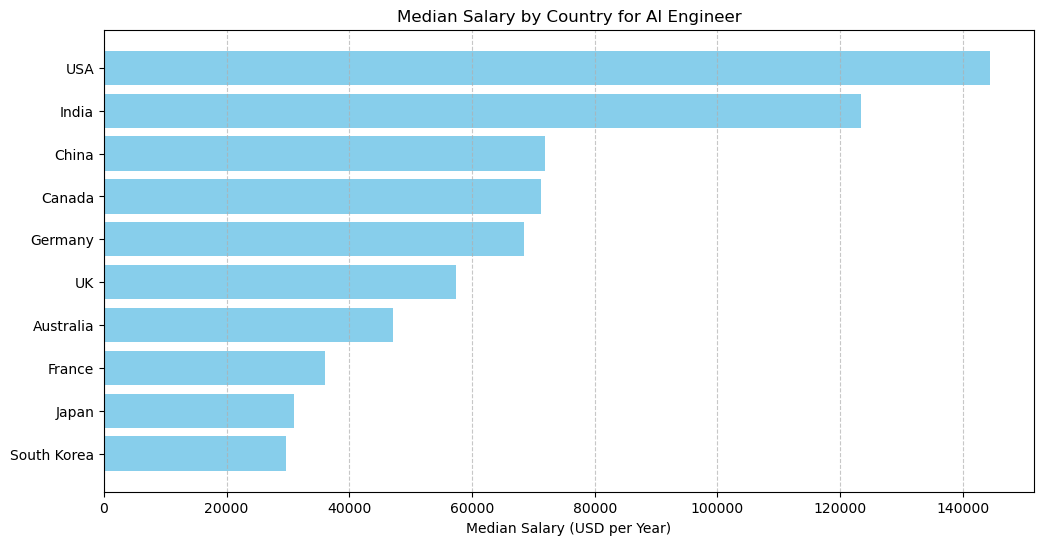

In [511]:
import matplotlib.pyplot as plt

# Plot

plt.figure(figsize=(12,6))
plt.barh(df_new_sorted["Country"], df_new_sorted["Median Salary"], color="skyblue")
plt.xlabel("Median Salary (USD per Year)")
plt.title("Median Salary by Country for AI Engineer")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [326]:
data_salary = df_new

In [120]:
#\Global_AI_Content_Impact_Dataset from Kaggle

In [122]:
df2 = pd.read_csv(r"C:\Users\sarah\OneDrive\Documentos\GitHub\Project 1 AI\Global_AI_Content_Impact_Dataset.csv")


In [124]:
df2.Industry.unique()


array(['Media', 'Legal', 'Automotive', 'Gaming', 'Retail', 'Education',
       'Healthcare', 'Marketing', 'Manufacturing', 'Finance'],
      dtype=object)

In [126]:
df2["Country"].unique()

array(['South Korea', 'China', 'USA', 'France', 'Australia', 'UK',
       'Canada', 'India', 'Japan', 'Germany'], dtype=object)

In [128]:
#df_new_columns = df_new[["proprietary_name", "products_openfda_device_name", "products_openfda_device_class"]]

In [130]:
df2.nunique()

Country                                        10
Year                                            6
Industry                                       10
AI Adoption Rate (%)                          199
AI-Generated Content Volume (TBs per year)    199
Job Loss Due to AI (%)                        196
Revenue Increase Due to AI (%)                197
Human-AI Collaboration Rate (%)               199
Top AI Tools Used                               7
Regulation Status                               3
Consumer Trust in AI (%)                      195
Market Share of AI Companies (%)              195
dtype: int64

In [132]:

df2.Country.value_counts()

Country
France         24
India          24
Japan          22
China          21
USA            21
South Korea    20
UK             20
Germany        17
Canada         16
Australia      15
Name: count, dtype: int64

In [ ]:
df2.tail(60)

In [487]:
df2


,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41,21.41
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Germany,2021,Automotive,89.44,52.98,48.47,12.14,30.60,DALL-E,Lenient,77,44.35
196,Germany,2020,Media,70.11,28.26,27.62,57.86,58.71,DALL-E,Strict,78,31.73
197,France,2023,Marketing,65.77,49.83,39.94,79.44,43.73,Synthesia,Lenient,81,14.62
198,Australia,2023,Automotive,45.35,20.49,33.21,50.50,41.73,Claude,Strict,47,43.11


In [491]:
df2_revenue = df2.sort_values(by=["Revenue Increase Due to AI (%)", 'Country'])

In [493]:
avg_revenue = df2_revenue.groupby('Country')["Revenue Increase Due to AI (%)"].mean().reset_index()

avg_revenue = avg_revenue.sort_values(by="Revenue Increase Due to AI (%)", ascending=False)

avg_revenue


,Country,Revenue Increase Due to AI (%)
0,Australia,49.701333
9,USA,43.520476
2,China,42.596190
4,Germany,40.580588
5,India,40.076250
3,France,39.554167
1,Canada,38.753125
8,UK,36.122000
6,Japan,34.608636
7,South Korea,34.252000


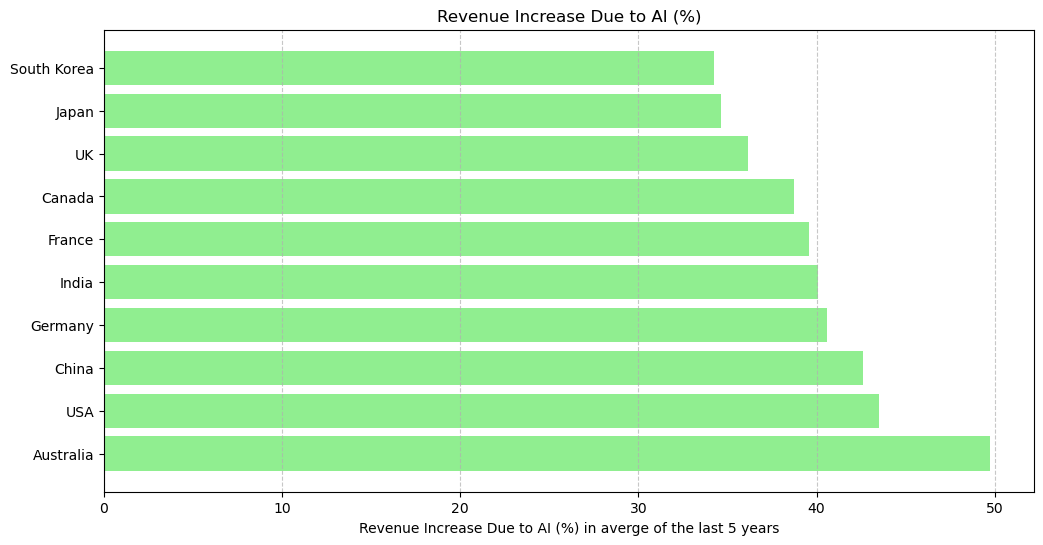

In [497]:
plt.figure(figsize=(12,6))
plt.barh(avg_revenue["Country"], avg_revenue["Revenue Increase Due to AI (%)"], color="lightgreen")
plt.xlabel("Revenue Increase Due to AI (%) in averge of the last 5 years")
plt.title("Revenue Increase Due to AI (%)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [448]:
df2_marketshare = df2.sort_values(by=["Market Share of AI Companies (%)", 'Country'])

In [ ]:
avg_marketshare = df2_marketshare.groupby('Country')["Market Share of AI Companies (%)", ""].mean().reset_index()

avg_marketshare = avg_marketshare.sort_values(by="Market Share of AI Companies (%)", ascending=False)

avg_marketshare


In [412]:
df2_Consumer_trust = df2.sort_values(by=["Consumer Trust in AI (%)", 'Country'])

In [417]:
# Group by 'Country' and calculate the mean of 'Consumer Trust in AI (%)'
avg_consumer_trust = df2_Consumer_trust.groupby('Country')["Consumer Trust in AI (%)"].mean().reset_index()

# Optional: Sort by highest average trust
avg_consumer_trust = avg_consumer_trust.sort_values(by="Consumer Trust in AI (%)", ascending=False)

# Display the ravg_consumer_trust


,Country,Consumer Trust in AI (%)
4,Germany,64.470588
0,Australia,63.133333
1,Canada,61.625000
6,Japan,60.454545
2,China,59.809524
7,South Korea,59.600000
5,India,59.416667
3,France,57.958333
9,USA,55.714286
8,UK,49.550000


In [429]:
df2_Consumer_trust["Consumer Trust in AI (%)"] = df2_Consumer_trust["Consumer Trust in AI (%)"].replace({',': ''}, regex=True).astype(int)


In [437]:
df2_new_sorted = avg_consumer_trust.sort_values(by="Consumer Trust in AI (%)",ascending=False)


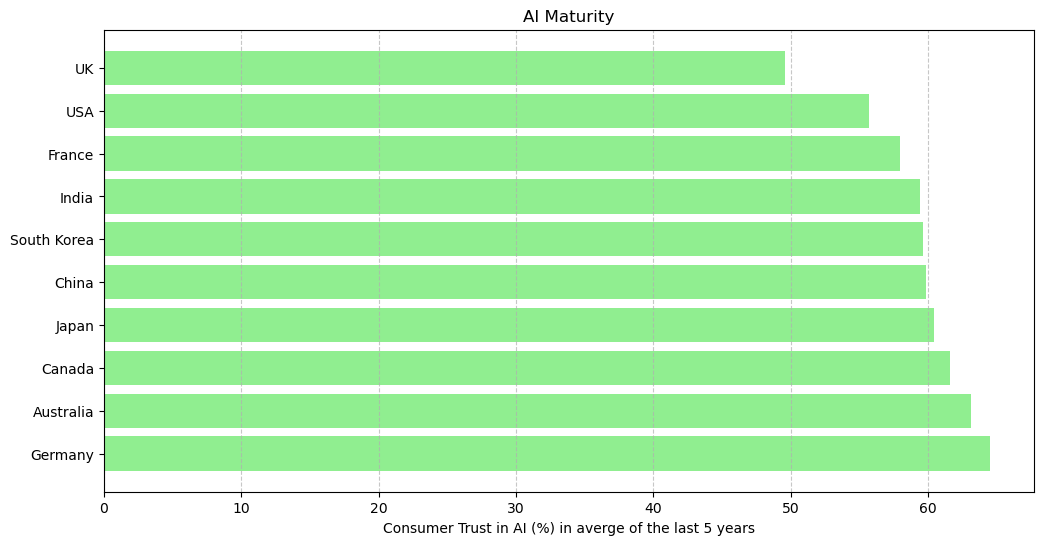

In [446]:
plt.figure(figsize=(12,6))
plt.barh(avg_consumer_trust["Country"], avg_consumer_trust["Consumer Trust in AI (%)"], color="lightgreen")
plt.xlabel("Consumer Trust in AI (%) in averge of the last 5 years")
plt.title("AI Maturity")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df2_new = df2.drop(['AI Adoption Rate (%)', 'AI-Generated Content Volume (TBs per year)', 'Job Loss Due to AI (%)', 'Human-AI Collaboration Rate (%)',
                   'Regulation Status','Top AI Tools Used' ], axis=1)

In [274]:
aggregation =df2_new.groupby(['Country','Year','Industry']).agg({'Revenue Increase Due to AI (%)':'mean', 'Consumer Trust in AI (%)': 'mean'})

In [276]:
df2_new.columns

Index(['Country', 'Year', 'Industry', 'Revenue Increase Due to AI (%)',
       'Consumer Trust in AI (%)', 'Market Share of AI Companies (%)'],
      dtype='object')

In [278]:
df = pd.merge(data_salary, df2_new, how='outer')

In [ ]:
df.head(45)

In [282]:
df.dropna(inplace = True)

In [ ]:
df.sort_values(by=["Year", 'Country', 'Industry'])

In [286]:
df.columns

Index(['Unnamed: 0', 'Country', 'Job Title', 'Minimum Salary',
       'Maximum Salary', 'Median Salary', 'Period', 'Currency', 'Year',
       'Industry', 'Revenue Increase Due to AI (%)',
       'Consumer Trust in AI (%)', 'Market Share of AI Companies (%)'],
      dtype='object')

In [292]:
df_marketing = df[df['Industry'] == 'Marketing']

In [294]:
df_marketing

,Unnamed: 0,Country,Job Title,Minimum Salary,Maximum Salary,Median Salary,Period,Currency,Year,Industry,Revenue Increase Due to AI (%),Consumer Trust in AI (%),Market Share of AI Companies (%)
30,6.0,Canada,AI Engineer,"56,409","90,049","71,271",YEAR,USD,2025,Marketing,4.72,64.49,45.04
73,3.0,France,AI Engineer,"32,630","39,521","36,076",YEAR,USD,2025,Marketing,71.69,44.26,41.99
134,8.0,Japan,AI Engineer,"19,384","42,492","30,938",YEAR,USD,2024,Marketing,26.45,59.28,20.74
149,0.0,South Korea,AI Engineer,"28,611","30,783","29,697",YEAR,USD,2023,Marketing,52.34,42.06,11.70
197,2.0,USA,AI Engineer,"115,342","182,886","144,358",YEAR,USD,2025,Marketing,24.96,66.28,10.51


In [296]:
df_marketing = df_marketing.drop( ['Unnamed: 0','Minimum Salary', 'Maximum Salary'], axis=1)


In [298]:
df_marketing

,Country,Job Title,Median Salary,Period,Currency,Year,Industry,Revenue Increase Due to AI (%),Consumer Trust in AI (%),Market Share of AI Companies (%)
30,Canada,AI Engineer,"71,271",YEAR,USD,2025,Marketing,4.72,64.49,45.04
73,France,AI Engineer,"36,076",YEAR,USD,2025,Marketing,71.69,44.26,41.99
134,Japan,AI Engineer,"30,938",YEAR,USD,2024,Marketing,26.45,59.28,20.74
149,South Korea,AI Engineer,"29,697",YEAR,USD,2023,Marketing,52.34,42.06,11.70
197,USA,AI Engineer,"144,358",YEAR,USD,2025,Marketing,24.96,66.28,10.51


In [175]:
# compare AI salaries to Salaries general in  Markting Industry /(test fe Weekend )

In [177]:
df_markting.sort_values(by=["Year", 'Country'])

,Country,Job Title,Median Salary,Period,Currency,Year,Industry,Revenue Increase Due to AI (%),Consumer Trust in AI (%),Market Share of AI Companies (%)
149,South Korea,AI Engineer,"29,697",YEAR,USD,2023,Marketing,52.34,42.06,11.70
134,Japan,AI Engineer,"30,938",YEAR,USD,2024,Marketing,26.45,59.28,20.74
30,Canada,AI Engineer,"71,271",YEAR,USD,2025,Marketing,4.72,64.49,45.04
73,France,AI Engineer,"36,076",YEAR,USD,2025,Marketing,71.69,44.26,41.99
197,USA,AI Engineer,"144,358",YEAR,USD,2025,Marketing,24.96,66.28,10.51


In [533]:
aggregation =df.groupby(['Country', 'Job Title', 'Minimum Salary', 'Maximum Salary',
       'Median Salary', 'Period', 'Currency', 'Year']).agg({'Revenue Increase Due to AI (%)':'mean', 'Consumer Trust in AI (%)': 'mean'})

In [486]:
aggregation = pd.DataFrame(aggregation).reset_index()
aggregation.sort_values(by="Revenue Increase Due to AI (%)")

,Country,Job Title,Minimum Salary,Maximum Salary,Median Salary,Period,Currency,Year,Revenue Increase Due to AI (%),Consumer Trust in AI (%)
9,USA,AI Engineer,"115,342","182,886","144,358",YEAR,USD,2025,23.560000,56.883333
0,Australia,AI Engineer,"45,207","48,937","47,072",YEAR,USD,2021,29.215000,57.370000
7,South Korea,AI Engineer,"28,611","30,783","29,697",YEAR,USD,2023,32.120000,62.513333
8,UK,AI Engineer,"40,593","81,347","57,464",YEAR,USD,2025,34.570000,58.760000
5,India,AI Engineer,"98,395","156,537","123,435",YEAR,USD,2025,35.731250,62.733750
6,Japan,AI Engineer,"19,384","42,492","30,938",YEAR,USD,2024,42.530000,56.800000
1,Canada,AI Engineer,"56,409","90,049","71,271",YEAR,USD,2025,51.420000,57.620000
3,France,AI Engineer,"32,630","39,521","36,076",YEAR,USD,2025,57.786667,41.833333
2,China,AI Engineer,"60,067","83,592","71,829",YEAR,USD,2024,66.310000,30.520000
4,Germany,AI Engineer,"31,960","105,080","68,520",YEAR,USD,2024,70.850000,83.170000


In [ ]:
##Salary for Jobs in the Marketing field with the same edit from Ai salary :) 

In [ ]:
import requests
import pandas as pd

url = "https://jsearch.p.rapidapi.com/estimated-salary"

headers = {
    "X-Rapidapi-Key": "8d87c09f6cmsh59ce4d8689ee10dp188f81jsnf92b2e28bf59",
    "X-Rapidapi-Host": "jsearch.p.rapidapi.com"
}

countries = [
    'South Korea', 'China', 'USA', 'France', 'Australia',
    'United Kingdom', 'Canada', 'India', 'Japan', 'Germany'
]

data_list = []  # to collect raw results

for country in countries:
    querystring = {
        "job_title": "Marketing",
        "location": country,
        "location_type": "ANY",
        "years_of_experience": "ALL"
    }

    response = requests.get(url, headers=headers, params=querystring)

    if response.status_code == 200:
        data = response.json()
        data_list.append({"country": country, "data": data})
       

   
data_list



In [199]:
marketing_salary = data_list

In [201]:
flattened = []
for entry in marketing_salary:
    
    country = entry["country"]
    data = entry["data"]
    
    request_id = data.get("result",{})
    parameters = data.get("parameters", {})
    marketing_salary = data.get("data", {})

    if marketing_salary:
        salary_info = marketing_salary[0]  # First record only
        flattened.append({
            "country": country,
            "data": data,
        
            **parameters,
            **salary_info
        })
    else:
        print(f"⚠️ No salary data for {country}")

# Convert flattened list to DataFrame
df3 = pd.DataFrame(flattened)


In [230]:
df3 = pd.read_csv(r"C:\Users\sarah\OneDrive\Documentos\GitHub\Project 1 AI\marketing_salary.csv")


In [232]:
df3_marketing = df3.drop(['data', 'location','location_type','years_of_experience','min_base_salary','max_base_salary','median_base_salary',
             'min_additional_pay', 'max_additional_pay', 'median_additional_pay','salary_count','publisher_name', 'publisher_link',
       'confidence'], axis=1)

In [234]:
# define and convert to year
conv_to_year = {
    'YEAR': 1,
    'MONTH': 12,
}

# Apply conversion
for x in ['min_salary', 'max_salary', 'median_salary']:
    df3_marketing[x] = df3_marketing.apply(
        lambda row: row[x] * conv_to_year[row['salary_period']], axis=1
    )

# After conversion, salary_period to 'YEAR' for all
df3_marketing['salary_period'] = 'YEAR'



In [236]:
#define amd than change the currency
conv_to_usd = {
    'USD': 1,
    'KRW': 0.00074,
    'CNY': 0.14,
    'EUR': 1.07,
    'AUD': 0.65,
    'GBP': 1.24,
    'CAD': 0.73,
    'JPY': 0.0065
}

# Apply conversion
for x in ['min_salary', 'max_salary', 'median_salary']:
    df3_marketing[x] = df3_marketing.apply(
        lambda row: row[x] * conv_to_usd.get(row['salary_currency'],1), axis=1
    )

# After conversion, salary_currency to 'USD' for all
df3_marketing['salary_currency'] = 'USD'

In [238]:
# Round and format salary info columns
for num in ['min_salary', 'max_salary', 'median_salary']:
    df3_marketing[num] = df3_marketing[num].apply(lambda x: f"{round(x):,}")


In [240]:
#change columns name 
df3_marketing = df3_marketing.rename(columns={
    'country': 'Country',
    'job_title': 'Job Title',
    'min_salary': 'Min Salary Marketing',
    'max_salary': 'Max Salary Marketing',
    'median_salary': 'Median Salary Marketing',
    'salary_currency': 'Currency',
    'salary_period': 'Period',
    'salaries_updated_at': 'Year'
})

In [242]:
# Convert the column to datetime 

# Then format it to just Year-Month
df3_marketing['Year'] = pd.to_datetime(df3_marketing['Year'], errors='coerce')
df3_marketing['Year'] = df3_marketing['Year'].dt.strftime('%Y-%m')

# Format to Year directly

df3_marketing['Year'] = df3_marketing['Year'].str[:4].astype(int)

In [244]:
#change uk so i can merge with the other data
df3_marketing['Country'] = df3_marketing['Country'].replace('United Kingdom', 'UK')

In [246]:
df3_marketing.columns

Index(['Unnamed: 0', 'Country', 'Job Title', 'Min Salary Marketing',
       'Max Salary Marketing', 'Median Salary Marketing', 'Period', 'Currency',
       'Year'],
      dtype='object')

In [254]:
df3_marketing.columns

Index(['Unnamed: 0', 'Country', 'Job Title', 'Min Salary Marketing',
       'Max Salary Marketing', 'Median Salary Marketing', 'Period', 'Currency',
       'Year'],
      dtype='object')

In [258]:
df3_markting = df3_marketing.drop(['Unnamed: 0','Min Salary Marketing', 'Max Salary Marketing'], axis=1)


In [260]:
df3_markting

,Country,Job Title,Median Salary Marketing,Period,Currency,Year
0,South Korea,Marketing,"32,560",YEAR,USD,2025
1,China,Marketing,"24,640",YEAR,USD,2025
2,USA,Marketing,"97,475",YEAR,USD,2025
3,France,Marketing,"53,232",YEAR,USD,2025
4,Australia,Marketing,"68,250",YEAR,USD,2025
5,UK,Marketing,"40,159",YEAR,USD,2025
6,Canada,Marketing,"43,468",YEAR,USD,2025
7,India,Marketing,"84,153",YEAR,USD,2025
8,Japan,Marketing,"45,500",YEAR,USD,2025
9,Germany,Marketing,"56,710",YEAR,USD,2025


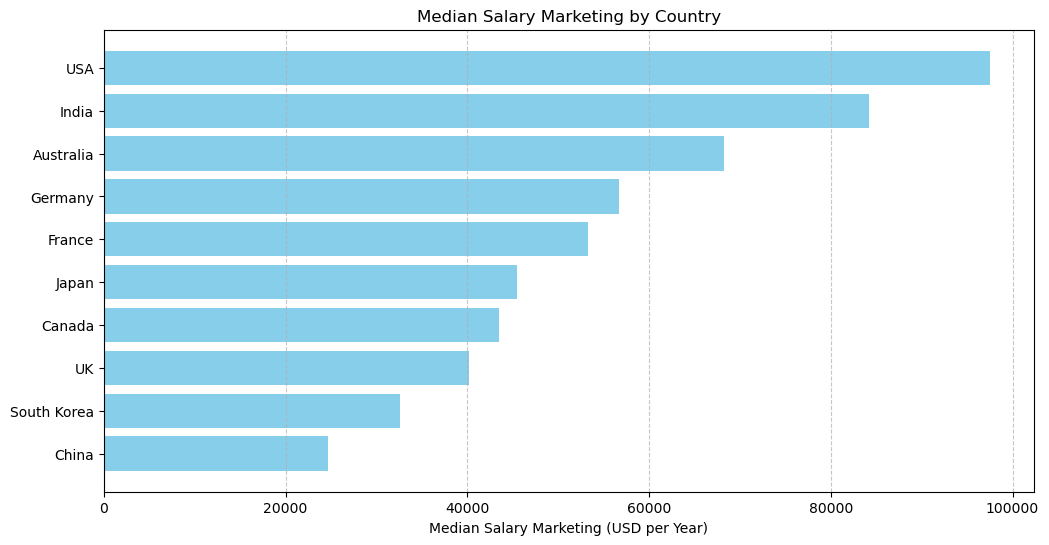

In [384]:
df3_markting["Median Salary Marketing"] = df3_markting["Median Salary Marketing"].replace({',': ''}, regex=True).astype(int)

df_new_sorted = df3_markting.sort_values(by="Median Salary Marketing")


# Plot

plt.figure(figsize=(12,6))
plt.barh(df_new_sorted["Country"], df_new_sorted["Median Salary Marketing"], color="skyblue")
plt.xlabel("Median Salary Marketing (USD per Year)")
plt.title("Median Salary Marketing by Country")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [300]:
marketing_all = pd.merge(df_marketing, df3_markting , how='outer')

In [312]:
marketing_all.drop(['Industry'],axis = 1)

,Country,Job Title,Median Salary,Period,Currency,Year,Revenue Increase Due to AI (%),Consumer Trust in AI (%),Market Share of AI Companies (%),Median Salary Marketing
0,Australia,Marketing,NaN,YEAR,USD,2025,NaN,NaN,NaN,"68,250"
1,Canada,AI Engineer,"71,271",YEAR,USD,2025,4.72,64.49,45.04,NaN
2,Canada,Marketing,NaN,YEAR,USD,2025,NaN,NaN,NaN,"43,468"
3,China,Marketing,NaN,YEAR,USD,2025,NaN,NaN,NaN,"24,640"
4,France,AI Engineer,"36,076",YEAR,USD,2025,71.69,44.26,41.99,NaN
5,France,Marketing,NaN,YEAR,USD,2025,NaN,NaN,NaN,"53,232"
6,Germany,Marketing,NaN,YEAR,USD,2025,NaN,NaN,NaN,"56,710"
7,India,Marketing,NaN,YEAR,USD,2025,NaN,NaN,NaN,"84,153"
8,Japan,AI Engineer,"30,938",YEAR,USD,2024,26.45,59.28,20.74,NaN
9,Japan,Marketing,NaN,YEAR,USD,2025,NaN,NaN,NaN,"45,500"
